# BNN on Pynq

This notebook covers how to use Binary Neural Networks on Pynq. 
It shows an example of image recognition with a Binarized Neural Network inspired at VGG-16, featuring 6 convolutional layers, 3 max pool layers and 3 fully connected layers

## 1. Instantiate a Classifier
Creating a classifier will automatically download the correct bitstream onto device and load the weights trained on the specified dataset. By default there are three sets of weights available for the CNV network using 1 bit for weights and activation - this example uses the streetview house number set.

In [1]:
import bnn
print(bnn.available_params(bnn.NETWORK_CNVW1A1))

classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,"streetview",bnn.RUNTIME_HW)

['streetview', 'road-signs', 'cifar10']


## 2. Get classes of dataset

In [2]:
print(classifier.classes)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '']


## 3. Open image to be classified

The image to be classified is loaded and shown:

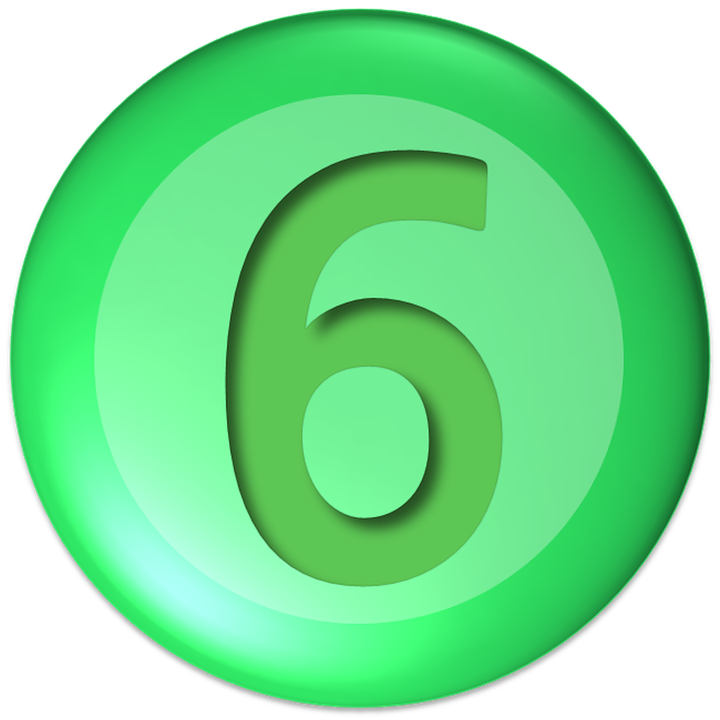

In [3]:
from PIL import Image
import numpy as np
img = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/6.png')
img

## 4. Launching BNN in hardware
The image is passed to PL and the inference is performed. The python API will automatically take care of formatting the picture to the right size that can be processed by CNV network.

In [4]:
result_class_idx = classifier.classify_image(img)
print("Inferred number: {0}".format(classifier.class_name(result_class_idx)))

Inference took 527.00 microseconds
Classification rate: 1897.53 images per second
Inferred number: 6


## 5. Launching BNN in software
The inference on the same image is performed in sofware on the ARM core:

In [5]:
sw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1, "streetview", bnn.RUNTIME_SW)
result_class_idx = sw_classifier.classify_image(img)
print("Inferred number: {0}".format(sw_classifier.class_name(result_class_idx)))

Inference took 418944.00 microseconds
Classification rate: 2.39 images per second
Inferred number: 6


## 6. Reset the device

In [6]:
from pynq import Xlnk

xlnk = Xlnk();
xlnk.xlnk_reset()